# XRD File reader and plotter

In [1]:
# Importamos librerias necesarias para nuestro programa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

---
## Se lee el archivo crudo

En esta parte del código se lee el archivo crudo proveniente del equipo de xrd y se trata para obtener una salida csv


In [5]:
file = open('../SrTiO3.uxd', mode='r')

content = file.read()

partes_importantes = content.split(';')

tabla_contenido = partes_importantes[7]

titles = tabla_contenido[1:15]

tabla_contenido = tabla_contenido.replace(titles, '2THETA, PSD\n')
tabla_contenido = tabla_contenido.replace('       ', ', ')
tabla_contenido = tabla_contenido.replace('      ', ', ')

file.close()

---
## Se convierte el archivo
En esta parte del código el contenido del archivo crudo se convierte en un archivo CSV para posteriormete abrirlo con pandas

In [6]:
output_file = open('data.csv', 'w')

output_file.write(tabla_contenido)

output_file.close()

Index([' 2THETA', ' PSD'], dtype='object')


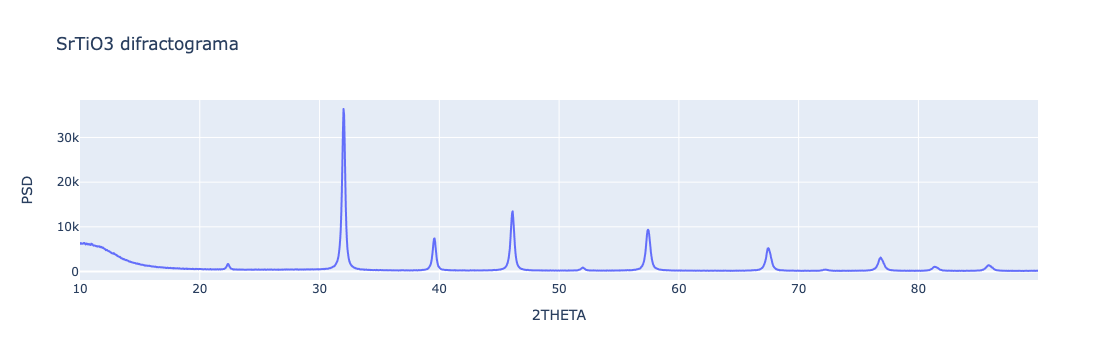

In [7]:
df = pd.read_csv('data.csv')

print(df.columns)

# Creamos una gráfica interactiva
fig = px.line(df, x=' 2THETA', y=' PSD', labels={'Name': '2theta', 'Value': 'values'}, title='SrTiO3 difractograma')
fig.update_traces(marker=dict(color='red')) # Set x-axis type to category for categorical data
fig.show()
